In [36]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
# deep learning modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras import regularizers
# data preprocessing
from keras.utils import to_categorical

In [38]:
# load the dataset and split into training/testing features and labels
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# data normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

In [39]:
# checking data structure
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


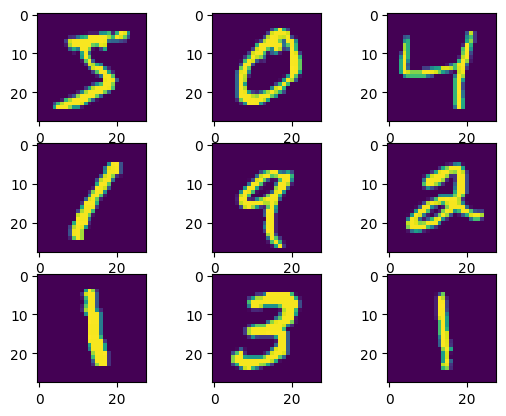

In [40]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i]) # add cmap=plt.get_cmap('gray') for greyscale
# show the figure
plt.show()

# Label enconding

In [41]:
# print first ten (integer valued) training labels
print('Integer-valued labels: ')
print(y_train[:10])

Integer-valued labels: 
[5 0 4 1 9 2 1 3 1 4]


In [42]:
# one-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#print first ten (one hot) training labels
print('One-hot labels: ')
print(y_train[:10])

One-hot labels: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [43]:
# epochs of training
n_epochs = 5


In [44]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63050 (246.29 KB)
Trainable params: 63050 (246.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# compile and run
model.compile(optimizer='Adam', loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2515 - accuracy: 0.9279 - val_loss: 0.1069 - val_accuracy: 0.9716
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0913 - accuracy: 0.9731 - val_loss: 0.0843 - val_accuracy: 0.9753
Epoch 3/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0671 - accuracy: 0.9800 - val_loss: 0.0708 - val_accuracy: 0.9799
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0535 - accuracy: 0.9840 - val_loss: 0.0689 - val_accuracy: 0.9793
Epoch 5/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.0663 - val_accuracy: 0.9807


Text(0.5, 0.98, 'CNN - Conv2D + MaxPooling')

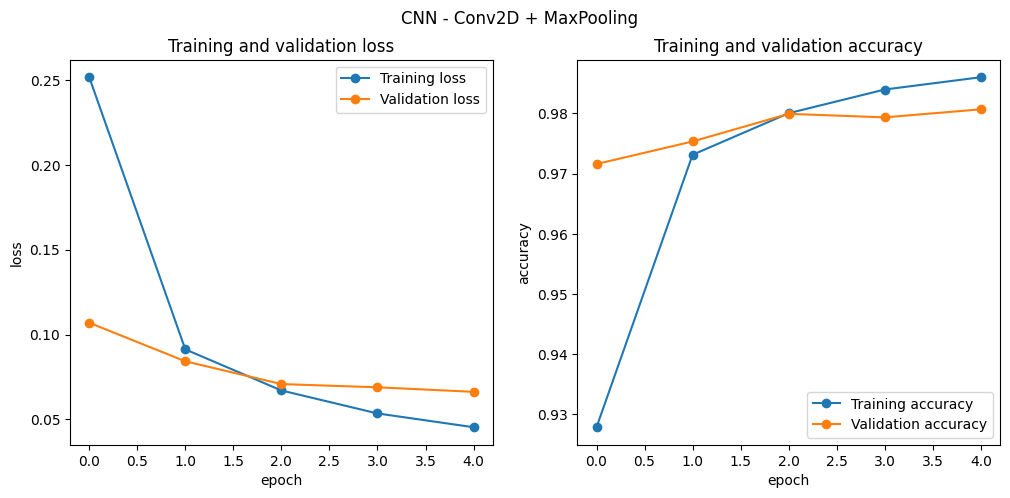

In [46]:
# training and validation loss
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(history.history['loss'],'-o', label='Training loss')
ax1.plot(history.history['val_loss'],'-o', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(loc='upper right')
ax2.plot(history.history['accuracy'],'-o', label='Training accuracy')
ax2.plot(history.history['val_accuracy'],'-o', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(loc='lower right')
f.suptitle('CNN - Conv2D + MaxPooling')

In [47]:


# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
# print test accuracy
print('Test accuracy %.2f%%' % accuracy)


from numpy import asarray
from numpy import argmax

# print options for float numbers
#np.set_printoptions(formatter={'float_kind':'{:.8f}'.format})

# make a prediction
image = x_test[102]
yhat = model.predict(asarray([image]))
print('Predicted values: ', yhat)
print('\nPredicted: class = %d' % argmax(yhat))
print('True class: ', np.argmax(y_test[102]))



Test accuracy 98.16%
1/1 [==============================] - 0s 40ms/step
Predicted values:  [[1.8499351e-12 1.8202674e-13 6.4913419e-10 7.6847535e-04 2.4977126e-11
  9.9901867e-01 2.3916467e-13 2.8427471e-09 1.0061801e-04 1.1222203e-04]]

Predicted: class = 5
True class:  5


In [48]:
predictions = model.predict(x_test)
tf.math.confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

313/313 [==============================] - 1s 3ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    1,    0,    0,    1,    2,    1,    1,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [   3,    4, 1013,    3,    2,    0,    1,    5,    0,    1],
       [   0,    0,    5,  997,    0,    2,    0,    2,    2,    2],
       [   0,    1,    0,    0,  975,    0,    0,    0,    0,    6],
       [   2,    1,    1,    5,    0,  878,    2,    1,    1,    1],
       [   9,    3,    0,    0,    3,    2,  938,    0,    3,    0],
       [   1,    6,   18,    4,    0,    0,    0,  991,    5,    3],
       [   7,    1,    4,    0,    3,    2,    1,    5,  944,    7],
       [   4,    5,    1,    3,    9,    4,    0,    8,    1,  974]],
      dtype=int32)>

Model Interpretation

In [49]:
# checking all layers present in the model
for layer in model.layers:
    print(layer.name) #, layer.inbound_nodes, layer.outbound_nodes

conv2d_1
max_pooling2d_1
flatten_1
dense_1


In [50]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d_1 (3, 3, 1, 32)


In [51]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
print(filters.shape, biases.shape)

(3, 3, 1, 32) (32,)


In [52]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

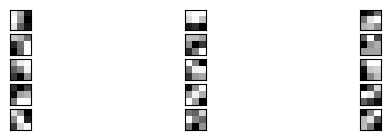

In [53]:
from matplotlib import pyplot

# plot first few filters
n_filters, ix = 15, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn off axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in greyscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [54]:
from keras.models import Model

# layer_outputs should match the number of Conv2D and MaxPooling2D blocks in the model
layer_outputs = [layer.output for layer in model.layers[0:4]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [55]:
layer_outputs

[<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 6272) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]

In [56]:
activation_model.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_input (InputLayer  [(None, 28, 28, 1)]       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63050 (246.29 KB)
Trainable params: 63050 (2

(-0.5, 27.5, 27.5, -0.5)

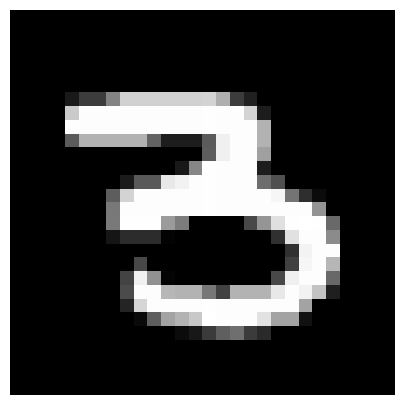

In [57]:
img = x_test[51].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

In [58]:
activations = activation_model.predict(img)

1/1 [==============================] - 0s 48ms/step


In [59]:
len(activations)

4

Grad cam

In [60]:


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )


    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)


    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


def plt_images(x_test, i_max, j_max):

  fig, axs = plt.subplots(i_max, j_max, figsize=plt.figaspect(0.5))
  for i in range(i_max):
    for j in range(j_max):
      ind = np.arange(i_max*j_max)[i*j_max+j]
      img = x_test[ind].reshape(1,28,28,1)
      axs[i, j].imshow(img[0,:,:,0], aspect='auto')

  return



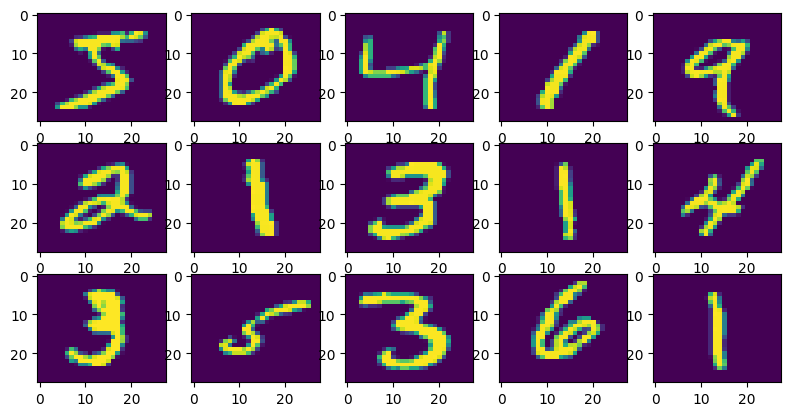

In [61]:
i_max = 3
j_max = 5
plt_images(x_train, i_max, j_max)

In [62]:
def plot_gradcam_images(i_max, j_max, x_test, model, layer_name):
  fig, axs = plt.subplots(i_max, j_max, figsize=plt.figaspect(0.5))
  for i in range(i_max):
    for j in range(j_max):
      ind = np.arange(i_max*j_max)[i*j_max+j]
      heatmap = make_gradcam_heatmap(tf.expand_dims(x_test[ind], axis=0), model, layer_name)
      axs[i, j].matshow(heatmap, aspect='auto')
  plt.tight_layout()
  plt.show()
  return

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63050 (246.29 KB)
Trainable params: 63050 (246.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


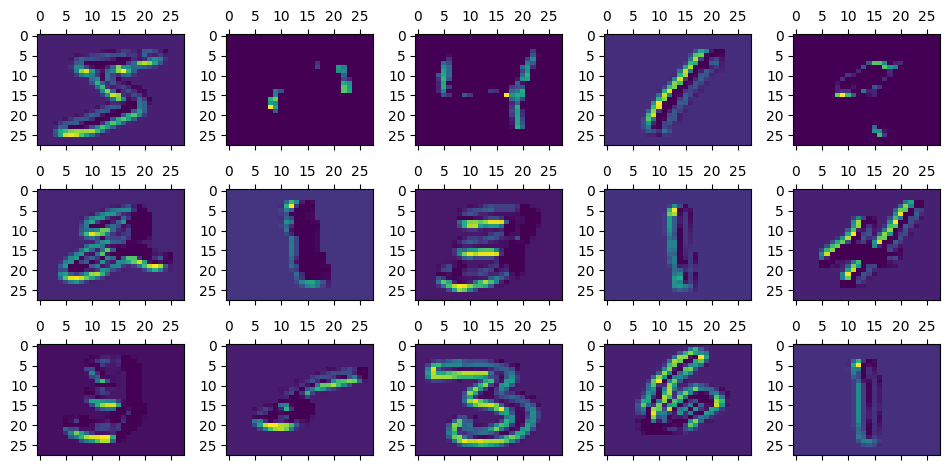

In [66]:

plot_gradcam_images(i_max, j_max, x_train, model, 'conv2d_1')

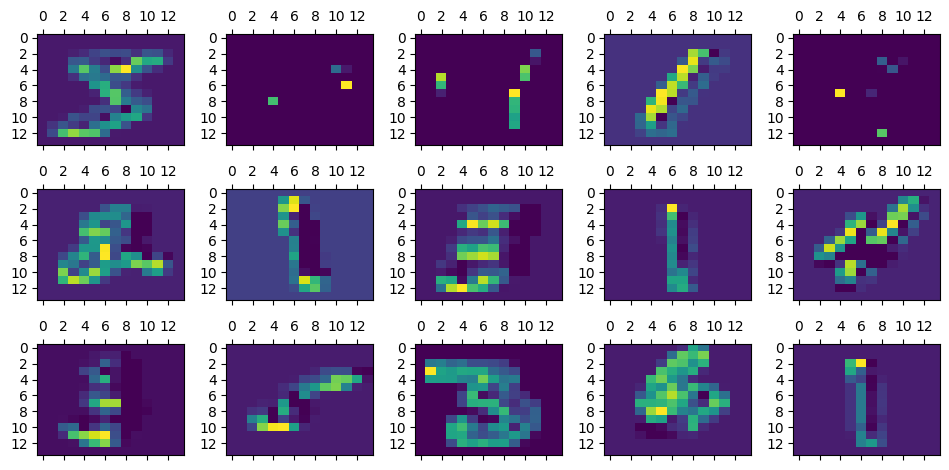

In [67]:
plot_gradcam_images(i_max, j_max, x_train, model, 'max_pooling2d_1')